In [2]:
import os
import pandas as pd
data = ['../data']

# Question 1
Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). 
* The column names. 
* The data types for each column. 

In [79]:
%time
dataPath = os.sep.join(data+['Iris_Data.csv'])
dataPath
df = pd.read_csv(dataPath)

print("Number of Data Points : ",df.shape[0])
print("Column names : ",df.columns.tolist())
print("Column data type :  ",df.dtypes)

df.head()

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
Number of Data Points :  150
Column names :  ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
Column data type :   sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Question 2
Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter.

In [80]:
df['species'] = df.species.str.replace('Iris-','')
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Question 3
Determine the following:

* The number of each species present. 
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

In [81]:
from collections import OrderedDict
df.species.value_counts()
pl_description = df.petal_length.describe()
sl_description = df.sepal_length.describe()
pw_description = df.petal_width.describe()
sw_description = df.sepal_width.describe()

x = { "Petal_Length Description":pl_description,"Sepall_Length Description":sl_description,
     "Petal_Width Description":pw_description,"Sepal_Width Description":sw_description}

keys = ['mean','std','First_Quantiles','median','Third_Quantile','Max_Min_Range']
iris_keys = ['mean','std','25%','50%','75%','max']

def formatData(doc):
    formatDict = OrderedDict()
    for i,key in enumerate(iris_keys):
        if(i==5):
                formatDict[keys[i]] = doc[key] - doc['min']
        else :
                formatDict[keys[i]] = doc[key]
        
        print(keys[i],formatDict[keys[i]])
   


for k,val in x.items():
     dta = {}
     print(k,sep='\n',end='\n\n') 
     dta =  formatData(val)
     print("*"*70,"\n\n")
     
     

Petal_Length Description

mean 3.75866666667
std 1.76442041995
First_Quantiles 1.6
median 4.35
Third_Quantile 5.1
Max_Min_Range 5.9
********************************************************************** 


Sepall_Length Description

mean 5.84333333333
std 0.828066127978
First_Quantiles 5.1
median 5.8
Third_Quantile 6.4
Max_Min_Range 3.6
********************************************************************** 


Petal_Width Description

mean 1.19866666667
std 0.763160741701
First_Quantiles 0.3
median 1.3
Third_Quantile 1.8
Max_Min_Range 2.4
********************************************************************** 


Sepal_Width Description

mean 3.054
std 0.433594311362
First_Quantiles 2.8
median 3.0
Third_Quantile 3.3
Max_Min_Range 2.4
********************************************************************** 




# Question 4
Calculate the following for each species in a separate dataframe:

The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
The median of each of these measurements.

In [93]:
import numpy as np
# print("\n\n means \n")
# df.groupby('petal_length').mean()
# print(df.groupby('petal_length').mean())
# print(df.groupby('sepal_length').mean())
# print(df.groupby('petal_width').mean())
# print(df.groupby('sepal_width').mean())
# print("\n\n Medians \n")
# print(df.groupby('petal_length').median())
# print(df.groupby('sepal_length').median())
# print(df.groupby('petal_width').median())
# print(df.groupby('sepal_width').median())

df.groupby('petal_length').agg([np.mean,np.median])
df.groupby('sepal_length').agg([np.mean,np.median])

sepal_width        petal_length        petal_width       
                    mean median         mean median        mean median
sepal_length                                                          
4.3             3.000000   3.00     1.100000   1.10    0.100000   0.10
4.4             3.033333   3.00     1.333333   1.30    0.200000   0.20
4.5             2.300000   2.30     1.300000   1.30    0.300000   0.30
4.6             3.325000   3.30     1.325000   1.40    0.225000   0.20
4.7             3.200000   3.20     1.450000   1.45    0.200000   0.20
4.8             3.180000   3.10     1.580000   1.60    0.200000   0.20
4.9             2.866667   3.05     2.283333   1.50    0.533333   0.15
5.0             3.120000   3.35     1.840000   1.55    0.430000   0.25
5.1             3.477778   3.50     1.722222   1.50    0.400000   0.30
5.2             3.425000   3.45     2.075000   1.50    0.475000   0.20
5.3             3.700000   3.70     1.500000   1.50    0.200000   0.20
5.4             3.550000   3.55     2.033333   1.60    0.516667   0.40
5.5             2.842857   2.50     3.228571   3.80    0.900000   1.10
5.6             2.816667   2.85     4.200000   4.15    1.416667   1.30
5.7             3.100000   2.85     3.587500   4.15    1.100000   1.25
5.8             2.885714   2.70     4.071429   4.10    1.400000   1.20
5.9             3.066667   3.00     4.700000   4.80    1.700000   1.80
6.0             2.733333   2.80     4.650000   4.65    1.500000   1.55
6.1             2.850000   2.85     4.750000   4.70    1.416667   1.40
6.2             2.825000   2.85     4.750000   4.65    1.725000   1.65
6.3             2.855556   2.80     5.133333   5.00    1.811111   1.80
6.4             2.957143   2.90     5.157143   5.30    1.871429   1.90
6.5             3.000000   3.00     5.240000   5.20    1.900000   2.00
6.6             2.950000   2.95     4.500000   4.50    1.350000   1.35
6.7             3.050000   3.10     5.262500   5.40    1.962500   1.95
6.8             3.000000   3.00     5.400000   5.50    1.933333   2.10
6.9             3.125000   3.10     5.275000   5.25    2.050000   2.20
7.0             3.200000   3.20     4.700000   4.70    1.400000   1.40
7.1             3.000000   3.00     5.900000   5.90    2.100000   2.10
7.2             3.266667   3.20     5.966667   6.00    1.966667   1.80
7.3             2.900000   2.90     6.300000   6.30    1.800000   1.80
7.4             2.800000   2.80     6.100000   6.10    1.900000   1.90
7.6             3.000000   3.00     6.600000   6.60    2.100000   2.10
7.7             3.050000   2.90     6.600000   6.70    2.200000   2.25
7.9             3.800000   3.80     6.400000   6.40    2.000000   2.00

In [95]:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in df.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
df.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

# Question 5
Make a scatter plot of sepal_length vs sepal_width using Matplotlib. Label the axes and give the plot a title.

[Text(0,0.5,'Sepal length'),
 Text(0.5,0,'Petal_Length'),
 Text(0.5,1,'Sepal Length vs Petal Length')]

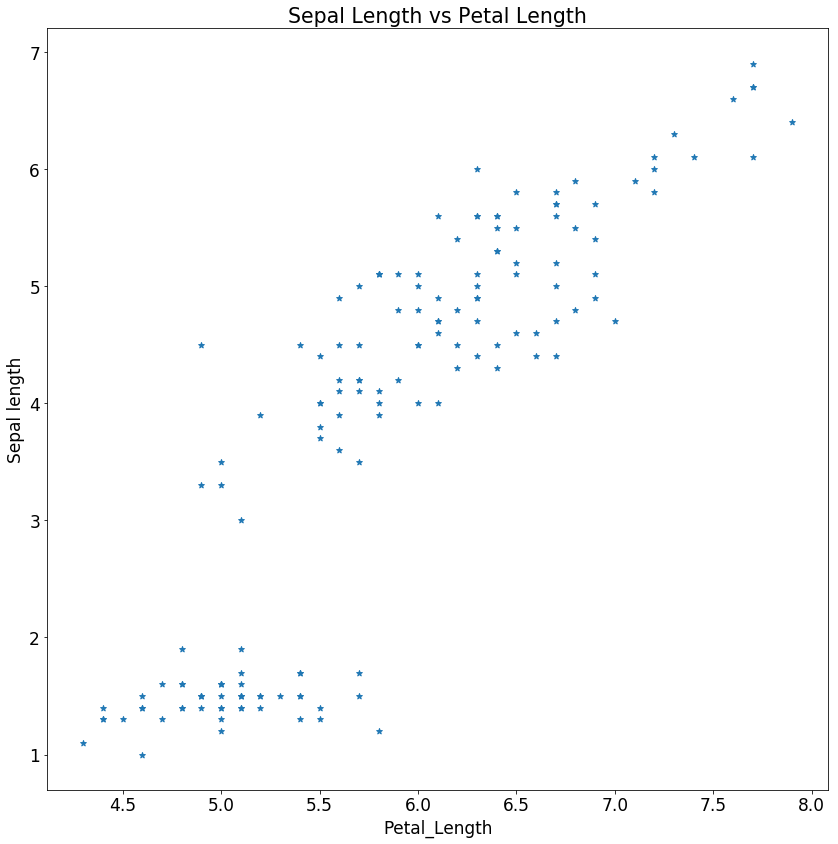

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(14,14)
plt.rcParams['font.size']=17
ax = plt.axes()
# markers = ['^','*','o']
# colors = {'setosa':'red','versicolor':'green','virginica':'blue'}
plt.scatter(df.sepal_length,df.petal_length,marker="*")
ax.set(xlabel='Petal_Length',ylabel='Sepal length',title='Sepal Length vs Petal Length')

# Question 6
Make a histogram of any one of the four features. Label axes and title it as appropriate.

[Text(0,0.5,'Count'),
 Text(0.5,0,'Sepal Length'),
 Text(0.5,1,'Sepal Length Histogram ')]

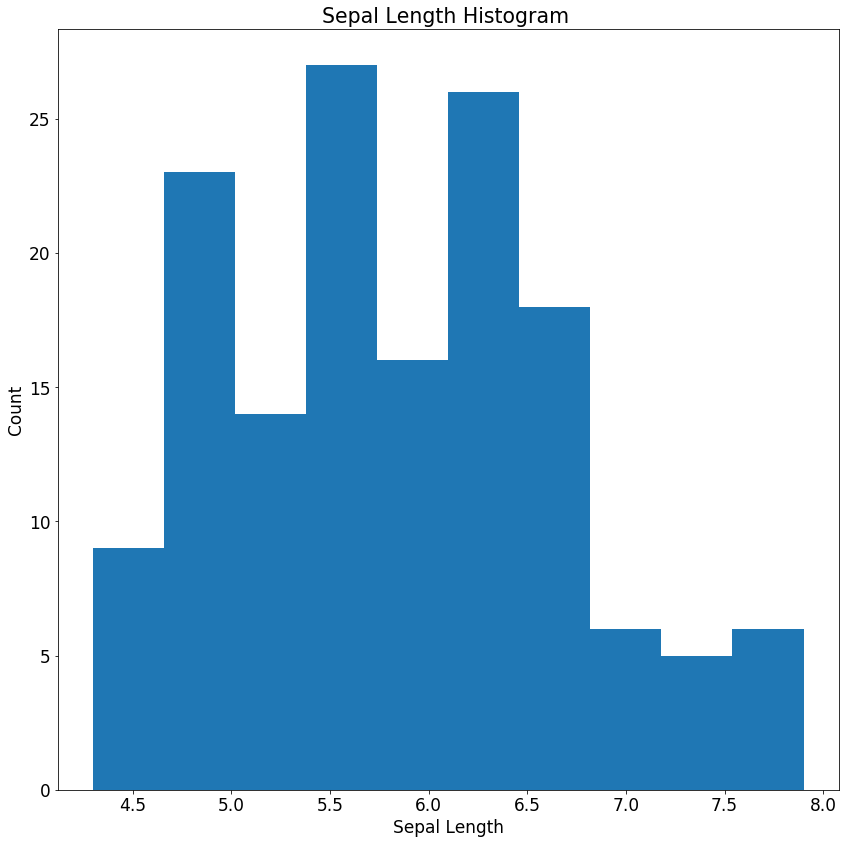

In [121]:
ax = plt.axes()
plt.hist(df.sepal_length)
ax.set(xlabel='Sepal Length',ylabel='Count',title='Sepal Length Histogram ')

# Question 7
Now create a single plot with histograms for each feature (petal_width, petal_length, sepal_width, sepal_length) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

Text(0,0.5,'Counts')

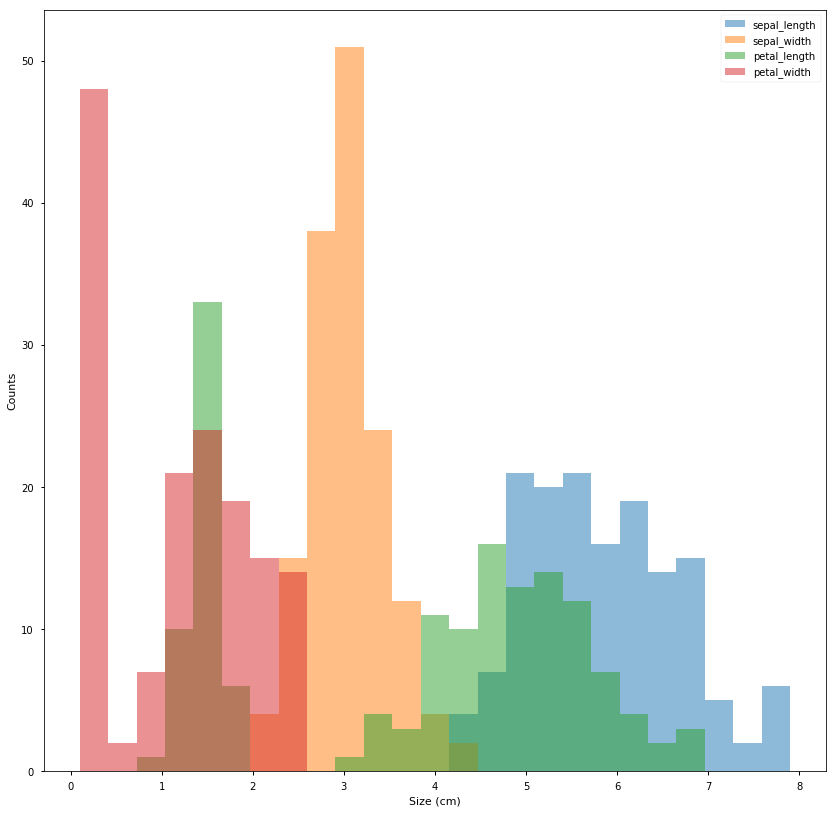

In [128]:
import seaborn as sns

sns.set_context('notebook')

# This uses the `.plot.hist` method
ax = df.plot.hist(bins=25, alpha=0.5)
ax.set_xlabel('Size (cm)');
ax.set_ylabel('Counts')

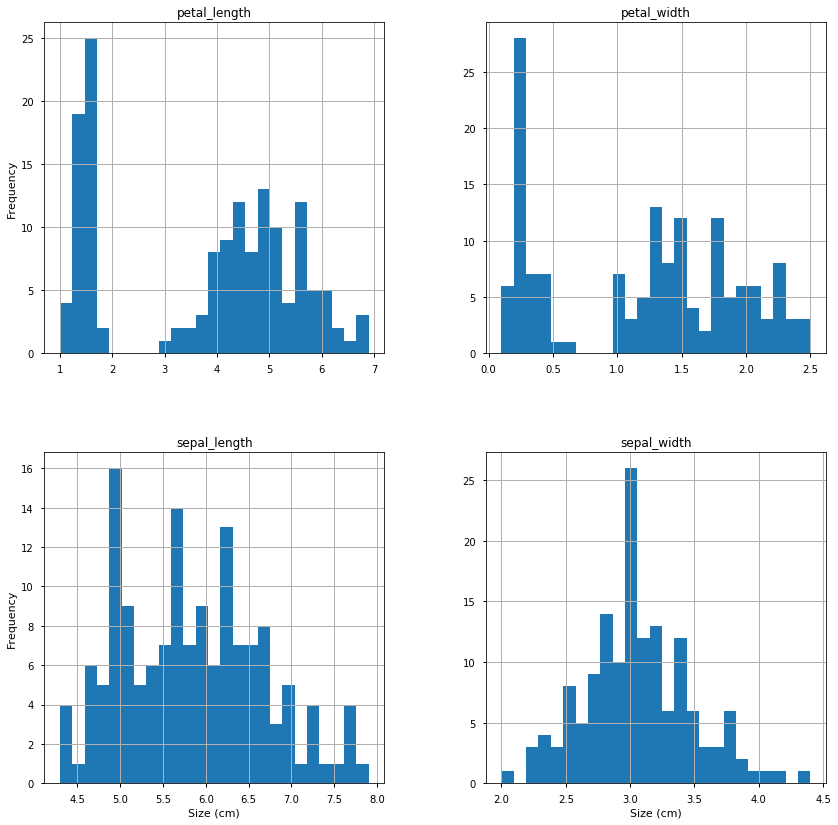

In [132]:
# To create four separate plots, use Pandas `.hist` method
axList = df.hist(bins=25)
# Add some x- and y- labels to first column and last row
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('Size (cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('Frequency')


# Question 8¶
Using Pandas, make a boxplot of each petal and sepal measurement. 

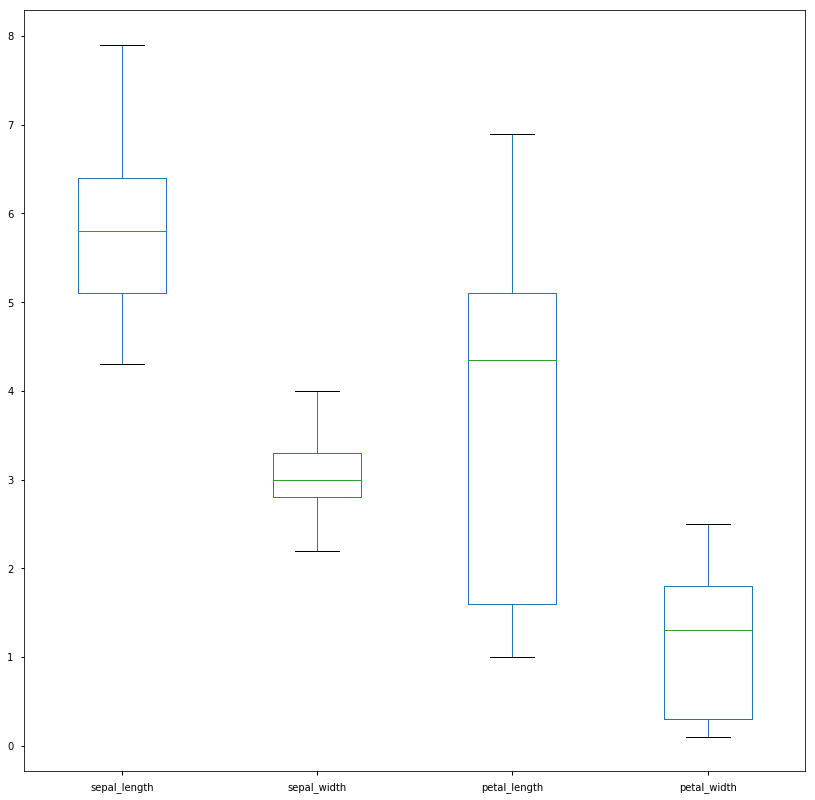

In [134]:
df.plot.box()

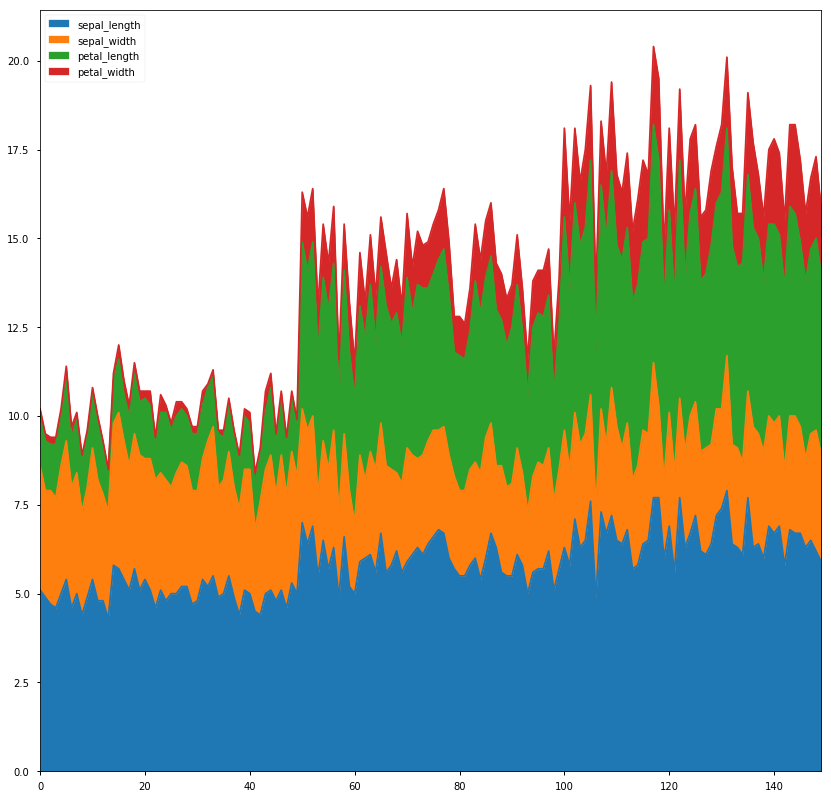

In [137]:
df.plot.area()

# Question 9
Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues.

In [148]:
plot_data = df.set_index('species')\
    .stack()\
    .to_frame()\
   .reset_index()\
   .rename(columns={0:'size','level_1':'measurement'})
plot_data.head(20)

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9
5,setosa,sepal_width,3.0
6,setosa,petal_length,1.4
7,setosa,petal_width,0.2
8,setosa,sepal_length,4.7
9,setosa,sepal_width,3.2


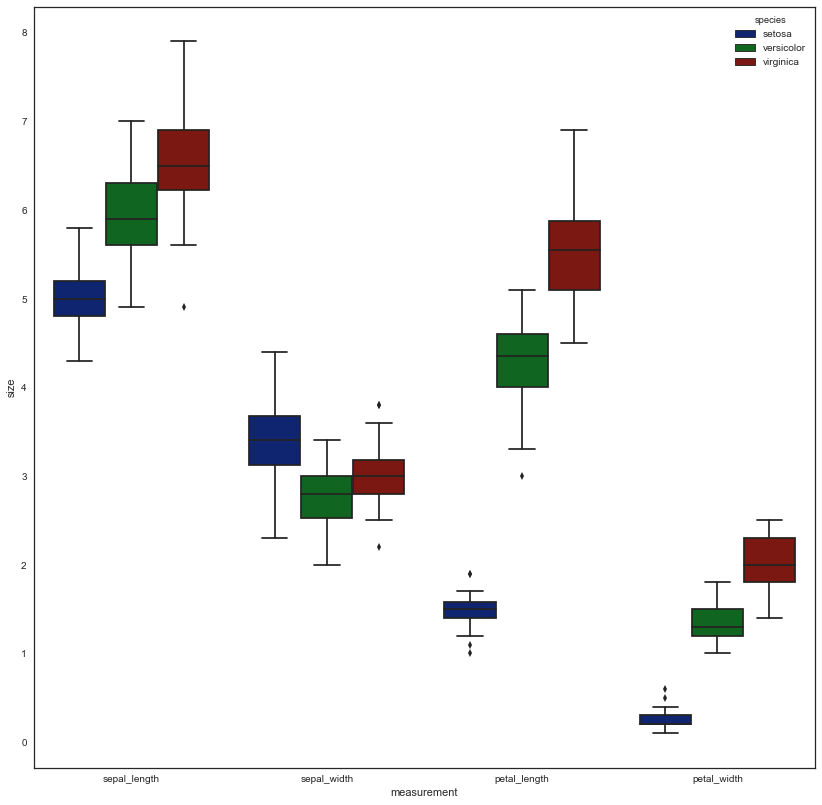

In [152]:
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')
sns.boxplot(x='measurement',y='size',hue='species',data=plot_data)

# Question 10¶
Make a pairplot with Seaborn to examine the correlation between each of the measurements.

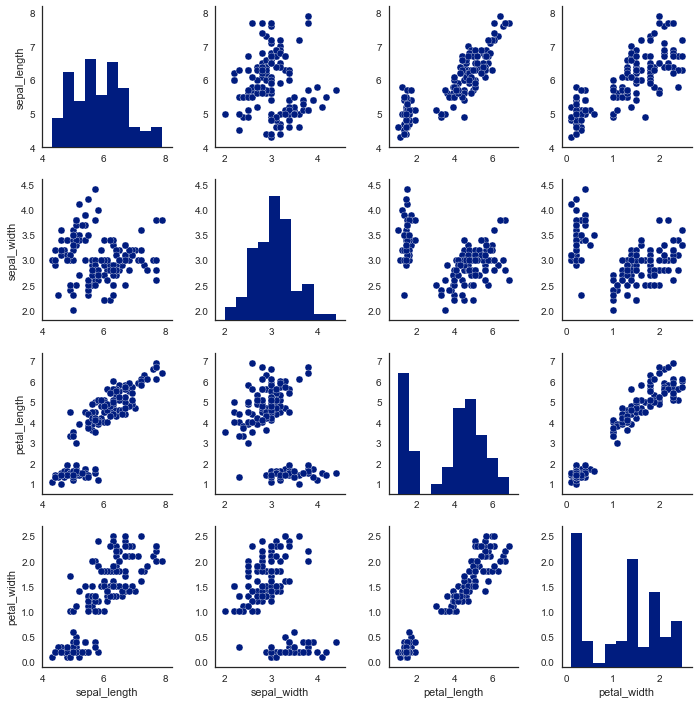

In [153]:
sns.pairplot(df)

# ** END of lesson **